<a href="https://colab.research.google.com/github/ennioguzman91/DataScienceLab/blob/main/Progetto_di_DS_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')
#path ="/content/drive/MyDrive/google_colab_data/DatasetClientClustering.csv"
path = 'DatasetClientClustering.csv'
dataset = pd.read_csv(path)

In [ ]:


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')
#path ="/content/drive/MyDrive/google_colab_data/DatasetClientClustering.csv"
#dataset = pd.read_csv(path)


!!!!

**jaccard_score ** 


may be a poor metric if there are no positives for some samples or classes. Jaccard is undefined if there are no true or predicted labels, and our implementation will return a score of 0 with a warning
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#:~:text=The%20Jaccard%20index%20%5B1%5D%2C,set%20of%20labels%20in%20y_true%20.&text=Predicted%20labels%2C%20as%20returned%20by%20a%20classifier.


!!!

In [ ]:
dataset.head()

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
0,Client1,0.597553,0.087787,20.778831,3.7027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000
1,Client2,0.501486,0.062290,15.228477,2.7327,0.714286,0.152761,0,1,45973,61,0.281602,0.174660,0.153599,0.629258,0.505362,0,2016,0,RM,0.5341,0.4466,0.0124,0.0000,0.0070
2,Client3,0.554108,0.000000,9.675789,0.5000,0.523810,0.243558,0,0,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,0,2015,0,BS,0.0000,0.0000,0.0000,0.0000,1.0000
3,Client4,0.440729,0.032341,9.563829,2.5676,0.619048,0.089571,0,0,25144,46,0.209610,0.548211,0.226218,0.218019,0.415670,0,2015,0,RE,0.6428,0.1220,0.0407,0.1943,0.0002
4,Client5,0.540528,0.037852,17.941533,2.4911,0.428571,0.162577,0,0,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,0,2015,0,MI,0.1707,0.2701,0.5332,0.0045,0.0215


Matrice di correlazione

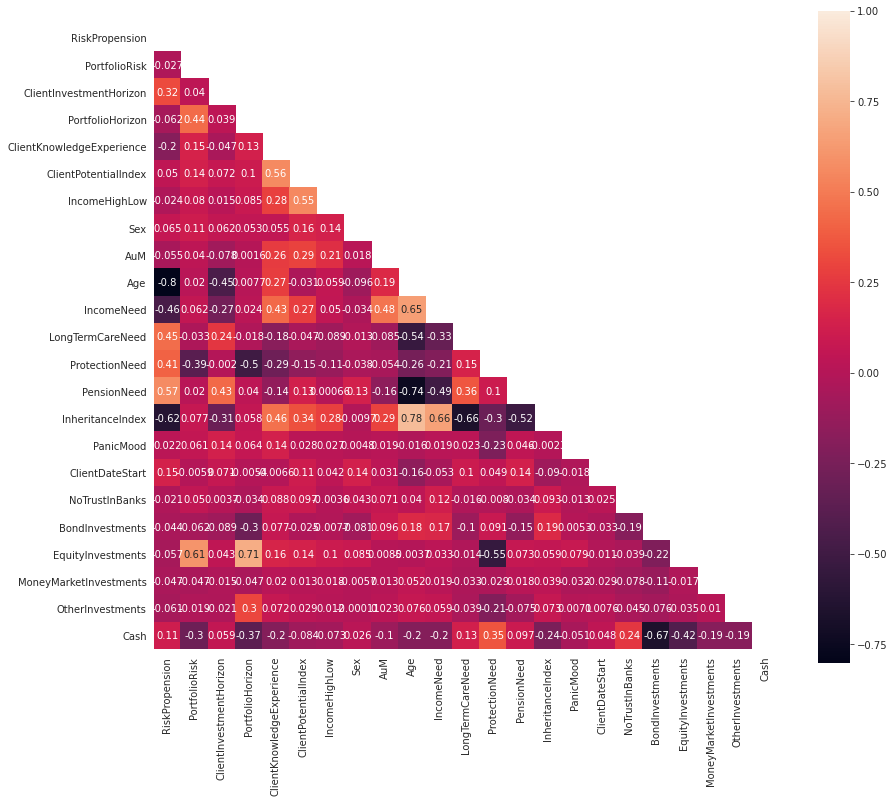

In [ ]:
import pandas as pd
corrMatrix = dataset.corr()
import seaborn as sn
import matplotlib.pyplot as plt
#sn.heatmap(corrMatrix,vmin=-1, vmax=1 , annot=True)
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):

    f, ax = plt.subplots(figsize=(14, 12))

    ax = sn.heatmap(corrMatrix, mask=mask, vmax=1, square=True, annot=True)
plt.show()

Variabili correlate positivamente: Age - Inheritance Index,  Inheritance Index - IncomeNeed

Variabili correlate negativamente: Age - Risk Propension, PensionNeed - Age

```
# This is formatted as code
```



In [ ]:
list(set(dataset.columns))

['ClientDateStart',
 'IncomeHighLow',
 'LongTermCareNeed',
 'OtherInvestments',
 'PortfolioRisk',
 'PanicMood',
 'MoneyMarketInvestments',
 'Cash',
 'AuM',
 'PensionNeed',
 'ClientInvestmentHorizon',
 'Prov',
 'RiskPropension',
 'ClientPotentialIndex',
 'IncomeNeed',
 'ClientID',
 'ClientKnowledgeExperience',
 'PortfolioHorizon',
 'Age',
 'Sex',
 'InheritanceIndex',
 'BondInvestments',
 'EquityInvestments',
 'NoTrustInBanks',
 'ProtectionNeed']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
X = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]].values


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[-2.94937583,  0.30302179],
       [ 0.1081894 , -0.44361355],
       [-2.8844168 ,  0.53420446],
       ...,
       [-0.91939199, -0.12617743],
       [ 0.4319685 , -0.41126234],
       [-3.05312492,  0.28485475]])

**Clusering 1 - Correlazione positiva**

Elbow

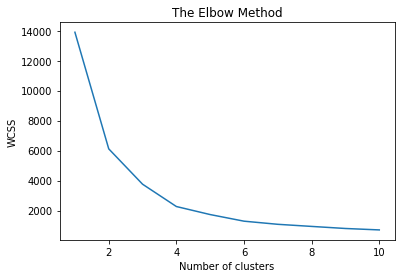

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=10000, random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters=[2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
  clusterer=KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels=clusterer.fit_predict(X)
  # the silhouette score gives the avg value for all the samples.
  # this gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X, cluster_labels)
  print( "for n_clusters =", n_clusters,"The average silhouette_score is:", silhouette_avg)
  # compute the silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X, cluster_labels)

for n_clusters = 2 The average silhouette_score is: 0.47977868780733496
for n_clusters = 3 The average silhouette_score is: 0.4529858972281945
for n_clusters = 4 The average silhouette_score is: 0.49277311592844947
for n_clusters = 5 The average silhouette_score is: 0.4655866434643398
for n_clusters = 6 The average silhouette_score is: 0.4890991186654941
for n_clusters = 7 The average silhouette_score is: 0.45359486092018486
for n_clusters = 8 The average silhouette_score is: 0.44328930149299184
for n_clusters = 9 The average silhouette_score is: 0.4431730830452834


k-means

In [ ]:
km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=3000, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(X)
labels = km.labels_

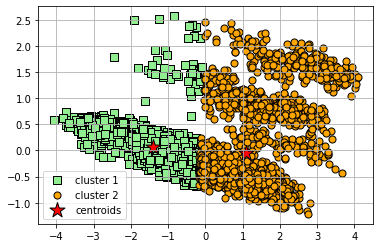

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#      X[y_km == 2, 0], X[y_km == 2, 1],
#      s=50, c='lightblue',
#      marker='v', edgecolor='black',
#      label='cluster 3'
#  )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
Data_clustered_1 = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]]
Data_clustered_1['Cluster'] = pd.Series(y_km, index=Data_clustered_1.index)
Data_clustered_1

,Age,IncomeNeed,InheritanceIndex,Cluster
0,22,0.079215,0.114803,0
1,61,0.281602,0.505362,1
2,24,0.124015,0.069924,0
3,46,0.209610,0.415670,0
4,57,0.320086,0.335057,0
...,...,...,...,...
4995,52,0.285918,0.541309,1
4996,45,0.774590,0.577970,1
4997,43,0.221488,0.421414,0
4998,65,0.320920,0.530526,1


In [ ]:
labels = km.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.7599213466405461

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  2
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


DBscan

In [ ]:
# df= dataset[["Age", "PensionNeed", 'RiskPropension']]
# df=df.sort_values(by=["Age", "PensionNeed", 'RiskPropension'])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
X = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]].values
# X = sc.fit_transform(X)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[ 3.25784127e+01, -7.37384291e-02],
       [-6.42398153e+00, -1.04902578e-01],
       [ 3.05786240e+01, -8.18909372e-02],
       ...,
       [ 1.15760439e+01, -1.00841200e-02],
       [-1.04242242e+01, -1.00667063e-01],
       [ 3.35785342e+01, -8.01438795e-02]])

In [ ]:
# from sklearn.metrics import davies_bouldin_score
# davies_bouldin_score(X, labels)

In [ ]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=1, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_km, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_km, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


numero di etichette  2
Estimated number of clusters: 2
Estimated number of noise points: 2007
Homogeneity: 0.143
Completeness: 0.101
V-measure: 0.119
Adjusted Rand Index: 0.055
Adjusted Mutual Information: 0.119
Silhouette Coefficient: 0.134


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

21.29976624901289

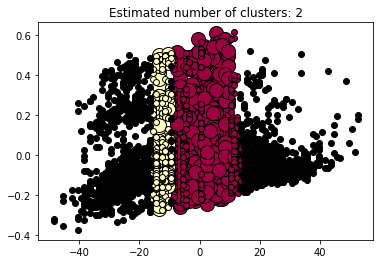

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
Data_clustered_2 = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]]
Data_clustered_2['Cluster'] = pd.Series(labels, index=Data_clustered_1.index)
Data_clustered_2

,Age,IncomeNeed,InheritanceIndex,Cluster
0,22,0.079215,0.114803,0
1,61,0.281602,0.505362,1
2,24,0.124015,0.069924,0
3,46,0.209610,0.415670,0
4,57,0.320086,0.335057,0
...,...,...,...,...
4995,52,0.285918,0.541309,1
4996,45,0.774590,0.577970,1
4997,43,0.221488,0.421414,0
4998,65,0.320920,0.530526,1


Hierarchical Clustering (using Ward method)

In [ ]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


In [ ]:
labels = hc.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)


0.7038035270238592

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  2
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.511
Completeness: 0.567
V-measure: 0.537


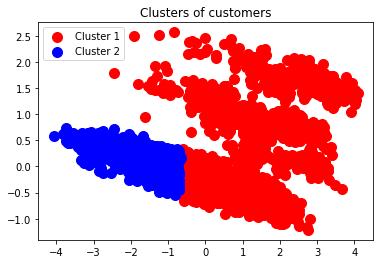

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
Data_clustered_3 = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]]
Data_clustered_3['Cluster'] = pd.Series(y_hc, index=Data_clustered_1.index)
Data_clustered_3

,Age,IncomeNeed,InheritanceIndex,Cluster
0,22,0.079215,0.114803,1
1,61,0.281602,0.505362,0
2,24,0.124015,0.069924,1
3,46,0.209610,0.415670,1
4,57,0.320086,0.335057,0
...,...,...,...,...
4995,52,0.285918,0.541309,0
4996,45,0.774590,0.577970,0
4997,43,0.221488,0.421414,1
4998,65,0.320920,0.530526,0


In [ ]:
Data_clustered_4 = dataset.loc[:, ["Age", "IncomeNeed", "InheritanceIndex"]]
Data_clustered_4['k-means'] = pd.Series(y_km, index=Data_clustered_1.index)
Data_clustered_4['DBscan'] = pd.Series(labels, index=Data_clustered_1.index)
Data_clustered_4['Hierarchical'] = pd.Series(y_hc, index=Data_clustered_1.index)
Data_clustered_4

,Age,IncomeNeed,InheritanceIndex,k-means,DBscan,Hierarchical
0,22,0.079215,0.114803,0,1,1
1,61,0.281602,0.505362,1,0,0
2,24,0.124015,0.069924,0,1,1
3,46,0.209610,0.415670,0,1,1
4,57,0.320086,0.335057,0,0,0
...,...,...,...,...,...,...
4995,52,0.285918,0.541309,1,0,0
4996,45,0.774590,0.577970,1,0,0
4997,43,0.221488,0.421414,0,1,1
4998,65,0.320920,0.530526,1,0,0


**Clustering 2 - Correlazione negativa**

In [ ]:


X = dataset.loc[:, ["Age", "RiskPropension", "PensionNeed"]].values
X

array([[22.        ,  0.59755307,  0.63376178],
       [61.        ,  0.50148641,  0.62925812],
       [24.        ,  0.55410828,  0.66367714],
       ...,
       [43.        ,  0.57777451,  0.58041768],
       [65.        ,  0.40216207,  0.11764683],
       [21.        ,  0.68553948,  0.28779509]])

In [ ]:
X = sc.fit_transform(X)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[ 2.10199197,  0.01031824],
       [ 0.31683407, -0.64648612],
       [ 1.91217095, -0.30766537],
       ...,
       [ 1.16279104, -0.02494535],
       [-1.42845212,  0.47785525],
       [ 1.72526339,  1.54798969]])

In [ ]:
X.shape

(5000, 2)

Elbow

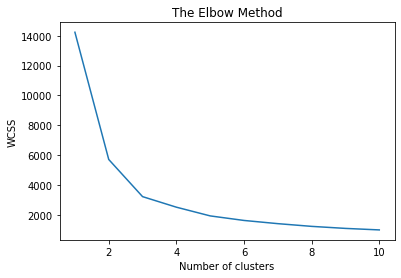

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=10000, random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters=[2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
  clusterer=KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels=clusterer.fit_predict(X)
  # the silhouette score gives the avg value for all the samples.
  # this gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X, cluster_labels)
  print( "for n_clusters =", n_clusters,"The average silhouette_score is:", silhouette_avg)
  # compute the silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X, cluster_labels)

for n_clusters = 2 The average silhouette_score is: 0.5112909796236312
for n_clusters = 3 The average silhouette_score is: 0.4826894661556298
for n_clusters = 4 The average silhouette_score is: 0.46105711898539137
for n_clusters = 5 The average silhouette_score is: 0.4325954042077572
for n_clusters = 6 The average silhouette_score is: 0.41736330816582906
for n_clusters = 7 The average silhouette_score is: 0.38425645178642637
for n_clusters = 8 The average silhouette_score is: 0.392550790771285
for n_clusters = 9 The average silhouette_score is: 0.39786622653192616


K-means

In [ ]:
km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=50, max_iter=30000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [ ]:
labels = km.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.6849466668079431

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  2
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


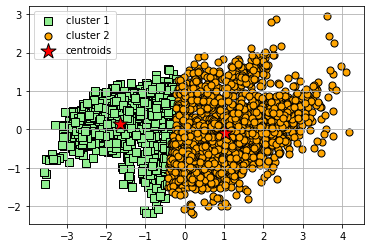

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#     X[y_km == 2, 0], X[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

DB Scan

In [ ]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.35, min_samples= 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_km, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_km, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


numero di etichette  1
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


ValueError: ignored

In [ ]:
labels = db.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

9.10273768730654

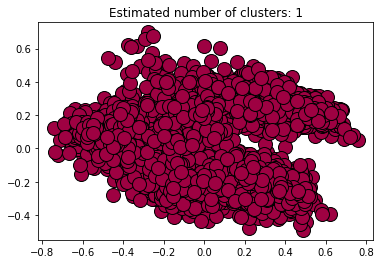

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Ward

In [ ]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
labels = hc.labels_


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.7164540971706491

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  3
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.550
Completeness: 0.352
V-measure: 0.429


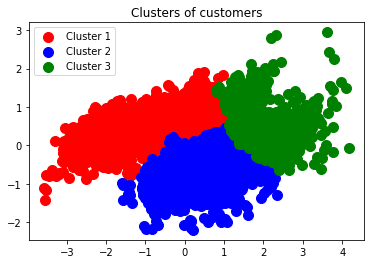

In [ ]:

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
Data_clustered_5 = dataset.loc[:, ["Age", "RiskPropension", "PensionNeed"]]
Data_clustered_5['k-means'] = pd.Series(y_km, index=Data_clustered_1.index)
Data_clustered_5['DBscan'] = pd.Series(labels, index=Data_clustered_1.index)
Data_clustered_5['Hierarchical'] = pd.Series(y_hc, index=Data_clustered_1.index)
Data_clustered_5

,Age,RiskPropension,PensionNeed,k-means,DBscan,Hierarchical
0,22,0.597553,0.633762,1,2,2
1,61,0.501486,0.629258,1,1,1
2,24,0.554108,0.663677,1,2,2
3,46,0.440729,0.218019,0,0,0
4,57,0.540528,0.506315,1,1,1
...,...,...,...,...,...,...
4995,52,0.417480,0.564139,1,1,1
4996,45,0.594193,0.557441,1,1,1
4997,43,0.577775,0.580418,1,1,1
4998,65,0.402162,0.117647,0,0,0


**Clustering 3 - Bisogni dei clienti**

In [ ]:
X = dataset.loc[:, ["IncomeNeed", "LongTermCareNeed", "ProtectionNeed", "PensionNeed"]].values
# X = sc.fit_transform(X)

X = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[-1.69985713, -1.28063251],
       [ 0.21159868, -1.14186136],
       [-2.57761788,  1.1721131 ],
       ...,
       [-1.32969029,  1.30142276],
       [ 0.76678505,  0.22531066],
       [-0.79792832, -1.049938  ]])

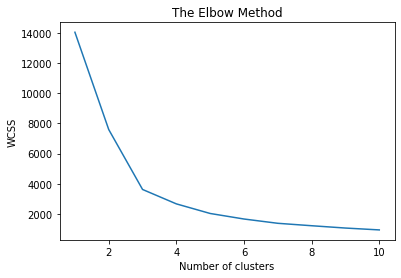

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=10000, random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters=[2,3,4,5,6,7,8,9, 10, 11, 12]
for n_clusters in range_n_clusters:
  clusterer=KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels=clusterer.fit_predict(X)
  # the silhouette score gives the avg value for all the samples.
  # this gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X, cluster_labels)
  print( "for n_clusters =", n_clusters,"The average silhouette_score is:", silhouette_avg)
  # compute the silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X, cluster_labels)

for n_clusters = 2 The average silhouette_score is: 0.4059141135710613
for n_clusters = 3 The average silhouette_score is: 0.5279524149292057
for n_clusters = 4 The average silhouette_score is: 0.46493024222814655
for n_clusters = 5 The average silhouette_score is: 0.4580076537221288
for n_clusters = 6 The average silhouette_score is: 0.41676078995452115
for n_clusters = 7 The average silhouette_score is: 0.42885707524732464
for n_clusters = 8 The average silhouette_score is: 0.41799453717093127
for n_clusters = 9 The average silhouette_score is: 0.3947759525888223
for n_clusters = 10 The average silhouette_score is: 0.40325853804648876
for n_clusters = 11 The average silhouette_score is: 0.39282951280336986
for n_clusters = 12 The average silhouette_score is: 0.39145549790465567


In [ ]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=400, max_iter=3000, 
    tol=1e-07, random_state=10
)
y_km = km.fit_predict(X)

In [ ]:
labels = km.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

0.6479003555082801

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  3
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


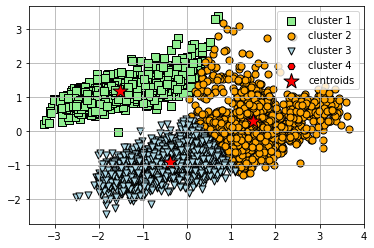

In [ ]:
# plot tclusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)



plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='red',
    marker='H', edgecolor='black',
    label='cluster 4'
)
# plt.scatter(
#     X[y_km == 4, 0], X[y_km == 4, 1],
#     s=50, c='pink',
#     marker='^', edgecolor='black',
#     label='cluster 5'
# )

# plt.scatter(
#     X[y_km == 5, 0], X[y_km == 5, 1],
#     s=50, c='blue',
#     marker='<', edgecolor='black',
#     label='cluster 6'
# )

# plt.scatter(
#     X[y_km == 6, 0], X[y_km == 6, 1],
#     s=50, c='yellow',
#     marker='>', edgecolor='black',
#     label='cluster 7'
# )

# plt.scatter(
#     X[y_km == 7, 0], X[y_km == 7, 1],
#     s=50, c='white',
#     marker='8', edgecolor='black',
#     label='cluster 8'
# )


# #'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X

# plt.scatter(
#     X[y_km == 8, 0], X[y_km == 8, 1],
#     s=50, c='brown',
#     marker='h', edgecolor='black',
#     label='cluster 9'
# )

# plt.scatter(
#     X[y_km == 9, 0], X[y_km == 9, 1],
#     s=50, c='grey',
#     marker='d', edgecolor='black',
#     label='cluster 10'
# )

# plt.scatter(
#     X[y_km == 10, 0], X[y_km == 10, 1],
#     s=50, c='violet',
#     marker='D', edgecolor='black',
#     label='cluster 11'
# )


#plot the centroids
plt.scatter(
      km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
      s=250, marker='*',
      c='red', edgecolor='black',
      label='centroids' )
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

DB Scan

In [ ]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.5, min_samples= 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_km, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_km, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


numero di etichette  1
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


ValueError: ignored

In [ ]:
labels = db.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

ValueError: ignored

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  1
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000


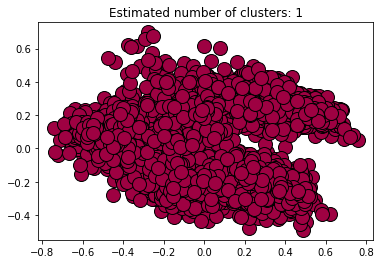

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Ward

In [ ]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
labels = hc.labels_


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)


0.6795389395939807

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  4
Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 0.753
Completeness: 0.599
V-measure: 0.667


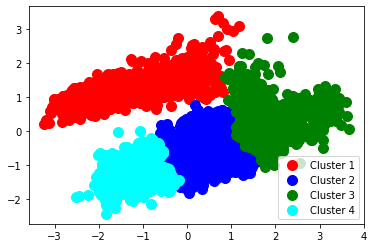

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 5')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'brown', label = 'Cluster 6')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'gray', label = 'Cluster 7')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'gold', label = 'Cluster 8')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Cluster 9')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 10')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 11')
# plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
Data_clustered_6 = dataset.loc[:, ["IncomeNeed", "LongTermCareNeed", "ProtectionNeed", "PensionNeed"]]
Data_clustered_6['k-means'] = pd.Series(y_km, index=Data_clustered_1.index)
Data_clustered_6['DBscan'] = pd.Series(labels, index=Data_clustered_1.index)
Data_clustered_6['Hierarchical'] = pd.Series(y_hc, index=Data_clustered_1.index)
Data_clustered_6

,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,k-means,DBscan,Hierarchical
0,0.079215,0.797512,0.204401,0.633762,2,3,3
1,0.281602,0.174660,0.153599,0.629258,2,1,1
2,0.124015,0.882995,0.769608,0.663677,0,0,0
3,0.209610,0.548211,0.226218,0.218019,2,1,1
4,0.320086,0.907644,0.703936,0.506315,0,0,0
...,...,...,...,...,...,...,...
4995,0.285918,0.448543,0.211391,0.564139,2,1,1
4996,0.774590,0.284940,0.707348,0.557441,1,2,2
4997,0.221488,0.524767,0.729378,0.580418,0,0,0
4998,0.320920,0.447410,0.337642,0.117647,1,1,1


**Clustering 4 - Profilo finanziario**

In [ ]:
list(set(dataset.columns))

['ClientDateStart',
 'IncomeHighLow',
 'LongTermCareNeed',
 'OtherInvestments',
 'PortfolioRisk',
 'PanicMood',
 'MoneyMarketInvestments',
 'Cash',
 'AuM',
 'PensionNeed',
 'ClientInvestmentHorizon',
 'Prov',
 'RiskPropension',
 'ClientPotentialIndex',
 'IncomeNeed',
 'ClientID',
 'ClientKnowledgeExperience',
 'PortfolioHorizon',
 'Age',
 'Sex',
 'InheritanceIndex',
 'BondInvestments',
 'EquityInvestments',
 'NoTrustInBanks',
 'ProtectionNeed']

In [ ]:
X = dataset.loc[:, ['RiskPropension',  'ClientKnowledgeExperience', 'ClientPotentialIndex', 'AuM']].values
# X = sc.fit_transform(X)

X = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[-1.93300419,  0.80440861],
       [-0.13961061, -0.16352225],
       [-0.64122821,  0.48753034],
       ...,
       [-1.16512895,  0.42144295],
       [-0.78480062, -0.77253683],
       [-1.08269131,  1.29398639]])

Elbow

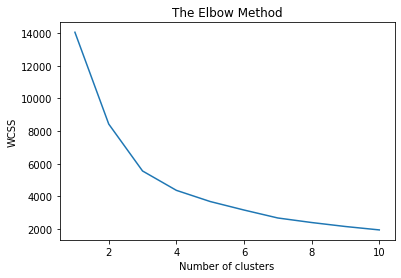

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter=10000, random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters=[2,3,4,5,6,7,8,9, 10, 11, 12]
for n_clusters in range_n_clusters:
  clusterer=KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels=clusterer.fit_predict(X)
  # the silhouette score gives the avg value for all the samples.
  # this gives a perspective into the density and separation of the formed clusters
  silhouette_avg=silhouette_score(X, cluster_labels)
  print( "for n_clusters =", n_clusters,"The average silhouette_score is:", silhouette_avg)
  # compute the silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X, cluster_labels)

for n_clusters = 2 The average silhouette_score is: 0.38668179333130204
for n_clusters = 3 The average silhouette_score is: 0.38443455088459594
for n_clusters = 4 The average silhouette_score is: 0.3679666197933191
for n_clusters = 5 The average silhouette_score is: 0.3581036606367148
for n_clusters = 6 The average silhouette_score is: 0.3585610261201732
for n_clusters = 7 The average silhouette_score is: 0.35260779274202164
for n_clusters = 8 The average silhouette_score is: 0.3429316213499575
for n_clusters = 9 The average silhouette_score is: 0.34052763870572034
for n_clusters = 10 The average silhouette_score is: 0.33229713273986305
for n_clusters = 11 The average silhouette_score is: 0.33044074062567763
for n_clusters = 12 The average silhouette_score is: 0.3344601665335176


Kmeans

In [ ]:
km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=30000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [ ]:
labels = km.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

1.0134038441248856

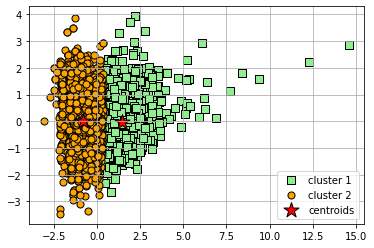

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#      X[y_km == 2, 0], X[y_km == 2, 1],
#      s=50, c='lightblue',
#      marker='v', edgecolor='black',
#      label='cluster 3'
# )

# plt.scatter(
#      X[y_km == 3, 0], X[y_km == 3, 1],
#      s=50, c='lightblue',
#      marker='h', edgecolor='black',
#      label='cluster 4'
# )


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

DBscan

In [ ]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.99, min_samples= 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_km, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_km, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


numero di etichette  0
Estimated number of clusters: 0
Estimated number of noise points: 5000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


ValueError: ignored

In [ ]:
labels = db.labels_
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

ValueError: ignored

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  0
Estimated number of clusters: 0
Estimated number of noise points: 5000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
labels = hc.labels_


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)


0.9572252907950219

In [ ]:
print("numero di etichette ", labels.max() +1 )
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_km, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_km, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_km, labels))

numero di etichette  2
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.565
Completeness: 0.641
V-measure: 0.600


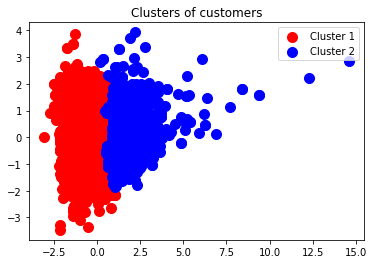

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
d={'label': list(labels), 'original data':list(X)}
data_labels=pd.DataFrame(data=d)

In [ ]:
for i in data_labels['original data']:
  print(i)
  

Streaming output truncated to the last 5000 lines.
[-1.93300419  0.80440861]
[-0.13961061 -0.16352225]
[-0.64122821  0.48753034]
[-0.6738464  -0.64765605]
[-1.09034645  0.35189814]
[-0.14122189  0.56715899]
[0.40557961 0.88646544]
[-0.77501995 -1.28992205]
[ 1.68735348 -1.16796651]
[-1.58786983  0.29912518]
[0.9359669  1.33437401]
[-1.93215383  0.70058297]
[ 0.45502698 -0.73369402]
[ 3.24152088 -0.79231864]
[-0.74407262  0.16639794]
[ 1.92848309 -0.80115441]
[ 0.36824787 -0.52224263]
[-1.21171667 -0.88923221]
[ 0.76659825 -0.54695723]
[0.55715004 0.18117993]
[ 0.72498109 -0.96398792]
[2.5122664  0.06326208]
[0.26231214 0.42012332]
[0.25942543 1.32506219]
[-0.32074482 -0.94674849]
[1.83112691 0.71828291]
[-2.1176854   0.23456911]
[ 0.26607283 -0.53083769]
[-1.20077316  0.64007891]
[1.28373851 0.90395506]
[ 1.5562321  -0.54277902]
[ 0.08580476 -1.17631658]
[-1.13848098  1.82555332]
[8.38891999 1.81243331]
[ 0.40450843 -0.26202273]
[0.92634112 0.07078019]
[-1.05269065 -0.03956706]
[-1.611

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

NameError: ignored

Ward

In [ ]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

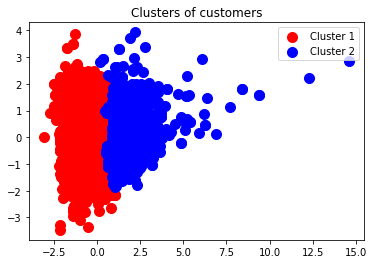

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
Data_clustered_7 = dataset.loc[:, ['RiskPropension',  'ClientKnowledgeExperience', 'ClientPotentialIndex', 'AuM']]
Data_clustered_7['k-means'] = pd.Series(y_km, index=Data_clustered_1.index)
Data_clustered_7['DBscan'] = pd.Series(labels, index=Data_clustered_1.index)
Data_clustered_7['Hierarchical'] = pd.Series(y_hc, index=Data_clustered_1.index)
Data_clustered_7

,RiskPropension,ClientKnowledgeExperience,ClientPotentialIndex,AuM,k-means,DBscan,Hierarchical
0,0.597553,0.285714,0.148466,13719,1,0,0
1,0.501486,0.714286,0.152761,45973,1,0,0
2,0.554108,0.523810,0.243558,10233,1,0,0
3,0.440729,0.619048,0.089571,25144,1,0,0
4,0.540528,0.428571,0.162577,222892,1,0,0
...,...,...,...,...,...,...,...
4995,0.417480,0.619048,0.174847,26348,1,0,0
4996,0.594193,0.809524,0.292025,1002570,0,1,1
4997,0.577775,0.523810,0.096933,31032,1,0,0
4998,0.402162,0.523810,0.142945,50243,1,0,0
